In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Visualization Library
import seaborn as sns #Visualization Library

Let's start our analysis by understanding each and every input variable ......

From the dataset the following attributes are used for identifying unique patinets.

Patinent_nbr : This attribute is used to identify unique patientsadmitted into the hospitals.
Encounter_id : This attribute gives information of Unique identifier of an patient encounter.

In [57]:
patient_details = pd.read_excel("C://Users//hp//Downloads//Paitent_details.xlsx")
patient_details.head()

,encounter_id,patient_nbr,race,gender,age,weight
0,2278392,8222157,Caucasian,Female,[0-10),?
1,149190,55629189,Caucasian,Female,[10-20),?
2,64410,86047875,AfricanAmerican,Female,[20-30),?
3,500364,82442376,Caucasian,Male,[30-40),?
4,16680,42519267,Caucasian,Male,[40-50),?


The data above consits of patients details who joins into the hospital in simple terms demographics like race, gender, age and weight of patients of each patient which plays crucial role in prescribing suitable treatment.

In [58]:
patient_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 6 columns):
encounter_id    101766 non-null int64
patient_nbr     101766 non-null int64
race            101766 non-null object
gender          101766 non-null object
age             101766 non-null object
weight          101766 non-null object
dtypes: int64(2), object(4)
memory usage: 4.7+ MB


In [59]:
patient_details.describe()

,encounter_id,patient_nbr
count,1.017660e+05,1.017660e+05
mean,1.652016e+08,5.433040e+07
std,1.026403e+08,3.869636e+07
min,1.252200e+04,1.350000e+02
25%,8.496119e+07,2.341322e+07
50%,1.523890e+08,4.550514e+07
75%,2.302709e+08,8.754595e+07
max,4.438672e+08,1.895026e+08


Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
Missing values in race : 2.2335554114340743


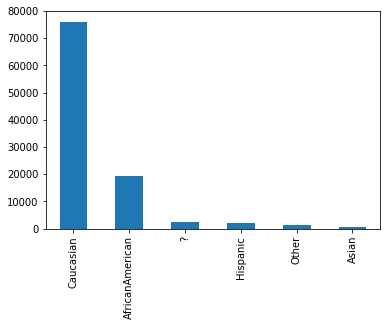

In [60]:
print(patient_details.race.value_counts())
print('Missing values in race :',(2273/101766)*100)
patient_details.race.value_counts().plot(kind='bar')

In [61]:
patient_details.race.replace('?',np.nan,inplace=True) # Replacing all '?' with null values
patient_details.race.fillna(patient_details.race.mode()[0],inplace=True) # Replacing all null values with mode
patient_details.isnull().any() # Checking if any null values are present in the data.
print('Since data is collected from US assuming that 2% missing values are caucasian race people and imputing it with caucasian')
patient_details.race.value_counts()

Since data is collected from US assuming that 2% missing values are caucasian race people and imputing it with caucasian


Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


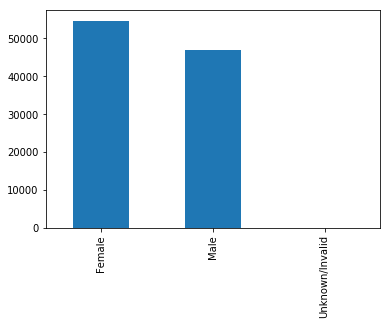

In [62]:
print(patient_details.gender.value_counts())
patient_details.gender.value_counts().plot(kind='bar')

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


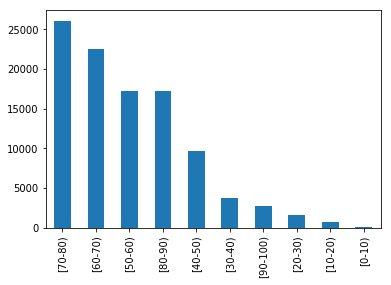

In [63]:
print(patient_details.age.value_counts())
patient_details.age.value_counts().plot(kind='bar')

In [64]:
print(patient_details.weight.value_counts())
print('Missing Values in weight:',(98569/101766)*100)

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
Missing Values in weight: 96.85847925633315


Since weight column has almost 97% missing values and weight is given as bins,if the data has missing values greater than 50% generally its better to drop the variable because imputation of values(>50%) may show wrong results.

In [108]:
Diagnosis_session = pd.read_excel("C://Users//hp//Downloads//Diagnosis_session.xlsx")
Diagnosis_session.head()

,patient_nbr,diag_1,diag_2,diag_3,number_diagnoses
0,8222157,250.83,?,?,1
1,55629189,276,250.01,255,9
2,86047875,648,250,V27,6
3,82442376,8,250.43,403,7
4,42519267,197,157,250,5


In [109]:
Diagnosis_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 5 columns):
patient_nbr         101766 non-null int64
diag_1              101766 non-null object
diag_2              101766 non-null object
diag_3              101766 non-null object
number_diagnoses    101766 non-null int64
dtypes: int64(2), object(3)
memory usage: 3.9+ MB


From the above data the attributes diag_1,diag_2,diag_3 are codes of treatments given to a patient for each encounter.
Number_diagnosis attributes gives the information about number of diagnosis taken each paient.v

In [67]:
admission_details = pd.read_excel('C://Users//hp//Downloads//admission_details.xlsx') #admission details
admission_details.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty
0,8222157,6,25,1,1,?,Pediatrics-Endocrinology
1,55629189,1,1,7,3,?,?
2,86047875,1,1,7,2,?,?
3,82442376,1,1,7,2,?,?
4,42519267,1,1,7,1,?,?


In [68]:
admission_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 7 columns):
patient_nbr                 101766 non-null int64
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
dtypes: int64(5), object(2)
memory usage: 5.4+ MB


# admission_type_id : Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available i.e which says how patient admitted into hospital.
# discharge_disposition_id : Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available i.e which says that how a patient is discharged from the hospital.
# admission_source_id : Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital i.e from where patient got admitted into the hospital.
# time_in_hospital : number of days between admission and discharge
# medical_speciality : identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family\general practice, and surgeon

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


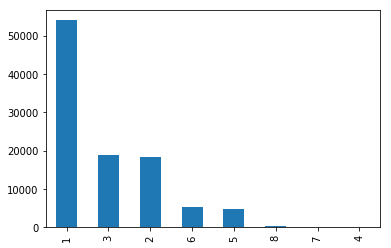

In [69]:
print(admission_details.admission_type_id.value_counts())
admission_details.admission_type_id.value_counts().plot(kind='bar')


53990 out of 101766 patients are admitting into the hospitals with admission type as 1
37,000 out of 101766 patients are admitting into the hospitals with admission type as 2 and 3

In [70]:
print(admission_details.discharge_disposition_id.value_counts())

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


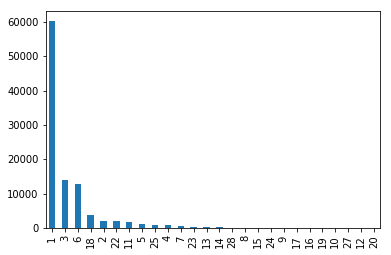

In [71]:
print(admission_details.discharge_disposition_id.value_counts().plot(kind='bar'))

From the above bar chart it is witnessed that 60% of patients are "discharged to home" which is indicated as disposition id 1.
Similarly disposition id 2 indicates discharged/transferred to another short term hospital.
Disposition id 3 indicates Discharged/transferred to SNF.

In [87]:
print(admission_details.payer_code.value_counts())
print('Missing Values in payer code :',(40256/101766)*100)

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64
Missing Values in payer code : 39.5574160328597


In [88]:
print(admission_details.medical_specialty.value_counts())

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

In [89]:

print('Missing Values in payer code :',(49949/101766)*100)

Missing Values in payer code : 49.08220820313268


In [90]:
diabetic_data = pd.read_csv('C://Users//hp//Downloads//diabetic_data.csv')
diabetic_data.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,None,None,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,NO
1,149190,None,None,No,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,None,None,No,No,No,No,No,No,Steady,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,None,None,No,No,No,No,No,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,None,None,No,No,No,No,No,No,Steady,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [91]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
encounter_id                101766 non-null int64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              101766 non-null object
glimepiride                 101766 non-null object
acetohexamide               101766 non-null object
glipizide                   101766 non-null object
glyburide                   101766 non-null object
tolbutamide                 101766 non-null object
pioglitazone                101766 non-null object
rosiglitazone               101766 non-null object
acarbose                    101766 non-null object
miglitol                    101766 non-null object
troglitazone                101766 non-null object
tolazamide             


The above diabetic Data says about different types of drugs used to treat the patients which consists of four values No,Steady,Up,Down which indicate dosage of drug given to a patient and No indicate drug is not given to the patient.
Two attributes which indicates the tests taken by each patient they are max_glu_selrum test and A1c result.
Change : This attribute indicates two values ch,No Ch indicates if there is any change in medication.
Diabetes Med: This attribute has two values Yes,No which says that a patient is given any medication for diabeties or not.
Readmission : This attribute tell us about wheather a patient is readmitting into the hospital.
# Creating new attribute which helps us to identify type of treatment given to each patient

In [92]:
treat=diabetic_data.iloc[:,3:26].replace(['Steady','Up','Down','No'],[1,1,1,0])
treat.set_index(diabetic_data.encounter_id,inplace=True)
print(treat.sum(axis=1).value_counts())

1    47314
0    23403
2    21873
3     7778
4     1335
5       58
6        5
dtype: int64


From the above we can infer combination of drugs given to the patient as a part of treatment.
#Intrestingly we can see that only few patients have given more combination of drugs.

In [93]:
print('insulin based treatments ',treat[treat['insulin']==1].sum(axis=1).value_counts())

print('insulin is not used for treating diabeties',treat[treat['insulin']==0].sum(axis=1).value_counts())

insulin based treatments  1    30965
2    15437
3     6625
4     1295
5       57
6        4
dtype: int64
insulin is not used for treating diabeties 0    23403
1    16349
2     6436
3     1153
4       40
6        1
5        1
dtype: int64


In [94]:
i_p=treat[treat['insulin']==1].sum(axis=1).replace([1,2,3,4,5,6],['insulin','io','io','io','io','io'])
i_a=treat[treat['insulin']==0].sum(axis=1).replace([0,1,2,3,4,5,6],['NoMed','other','other','other','other','other','other'])
treatments=pd.concat([i_p,i_a])
treatments = pd.DataFrame({'treatments':treatments})

In [95]:
diabetic_data=diabetic_data.join(treatments,how='inner',on='encounter_id')
diabetic_data.head()

,encounter_id,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,treatments
0,2278392,None,None,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,NO,NoMed
1,149190,None,None,No,No,No,No,No,No,No,...,Up,No,No,No,No,No,Ch,Yes,>30,insulin
2,64410,None,None,No,No,No,No,No,No,Steady,...,No,No,No,No,No,No,No,Yes,NO,other
3,500364,None,None,No,No,No,No,No,No,No,...,Up,No,No,No,No,No,Ch,Yes,NO,insulin
4,16680,None,None,No,No,No,No,No,No,Steady,...,Steady,No,No,No,No,No,Ch,Yes,NO,io


In [96]:
# According to the given objective there is no varible which tells us about what kind of treatment is given to a patients but we have information of drugs given to a patients by using those 23 drug column created a new column which simply represents all 23 column information in one column named 'Treatments' (Treatment Column represents all 23 drug column information).

In [97]:
#Dropping all drug details because all information been represented in one column which results in redundancy
diabetic_data.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis=1,inplace=True)

In [98]:
lab_session = pd.read_excel("C://Users//hp//Downloads//Lab-session.xlsx")
lab_session.head()

,encounter_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,2278392,41,0,1,0,0,0
1,149190,59,0,18,0,0,0
2,64410,11,5,13,2,0,1
3,500364,44,1,16,0,0,0
4,16680,51,0,8,0,0,0


In [99]:
lab_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 7 columns):
encounter_id          101766 non-null int64
num_lab_procedures    101766 non-null int64
num_procedures        101766 non-null int64
num_medications       101766 non-null int64
number_outpatient     101766 non-null int64
number_emergency      101766 non-null int64
number_inpatient      101766 non-null int64
dtypes: int64(7)
memory usage: 5.4 MB


num_lab_procedures : Number of lab tests performed during the encounter
Num_procedures : Number of procedures (other than lab tests) performed during the encounter
num_medications : Number of distinct generic names administered during the encounter
number_outpatients : Number of outpatient visits of the patient in the year preceding the encounter
number_emergency : Number of emergency visits of the patient in the year preceding the encounter
number_inpatient : Number of inpatient visits of the patient in the year preceding the encounter

#Merging individual DataFrames consists details of patients into one DataFrame

In [110]:
data=pd.concat([patient_details,admission_details,Diagnosis_session,lab_session,diabetic_data],axis=1)

In [111]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,...,number_outpatient,number_emergency,number_inpatient,encounter_id,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
0,2278392,8222157,Caucasian,Female,[0-10),?,8222157,6,25,1,...,0,0,0,2278392,None,None,No,No,NO,NoMed
1,149190,55629189,Caucasian,Female,[10-20),?,55629189,1,1,7,...,0,0,0,149190,None,None,Ch,Yes,>30,insulin
2,64410,86047875,AfricanAmerican,Female,[20-30),?,86047875,1,1,7,...,2,0,1,64410,None,None,No,Yes,NO,other
3,500364,82442376,Caucasian,Male,[30-40),?,82442376,1,1,7,...,0,0,0,500364,None,None,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),?,42519267,1,1,7,...,0,0,0,16680,None,None,Ch,Yes,NO,io


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 32 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
patient_nbr                 101766 non-null int64
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
patient_nbr                 101766 non-null int64
diag_1                      101766 non-null object
diag_2                      101766 non-null object
diag_3                      101766 non-null object
number_diagnoses            10

In [113]:
# Removing all duplicate columns present in dataset after merging.
data_final=data.T.drop_duplicates().T

In [114]:
#From the initial analysis the below three columns have large missing values and diag_1,diag_2,diag_3 are codes which are mostly not useful in our analysis.
data_final.drop(['weight','payer_code','medical_specialty','diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [116]:
data_final.head()


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_diagnoses,...,num_medications,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,1,...,1,0,0,0,None,None,No,No,NO,NoMed
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,9,...,18,0,0,0,None,None,Ch,Yes,>30,insulin
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,6,...,13,2,0,1,None,None,No,Yes,NO,other
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,7,...,16,0,0,0,None,None,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,5,...,8,0,0,0,None,None,Ch,Yes,NO,io


In [117]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 22 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
number_diagnoses            101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient            101766 non-null object
max_glu_serum               101766 non-null object
A1Cresult             

In [49]:
data_final.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,num_medications,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,1,0,0,0,None,None,No,No,NO,NoMed
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,18,0,0,0,None,None,Ch,Yes,>30,insulin
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,13,2,0,1,None,None,No,Yes,NO,other
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,16,0,0,0,None,None,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,8,0,0,0,None,None,Ch,Yes,NO,io


In [118]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 22 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
number_diagnoses            101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient            101766 non-null object
max_glu_serum               101766 non-null object
A1Cresult             

# FINDING SOLO INSULIN OR INSULIN CONJUNCTION WITH OTHER DRUGS ARE MORE EFFECTIVE FOR DIABETIC PATIENTS FROM THE DATA.

In [121]:
eff_diab_data=data_final[(data_final['diabetesMed']=='Yes')&(data_final['readmitted']=='NO')&(data_final['treatments'].isin(['insulin','io']))&(~data_final.discharge_disposition_id.isin([11,13,14,19,20]))]
print(eff_diab_data.shape)
eff_diab_data.head()


(26820, 22)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_diagnoses,...,num_medications,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,7,...,16,0,0,0,None,None,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,5,...,8,0,0,0,None,None,Ch,Yes,NO,io
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,7,...,21,0,0,0,None,None,Ch,Yes,NO,io
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,8,...,28,0,0,0,None,None,Ch,Yes,NO,io
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,8,...,18,0,0,0,None,None,Ch,Yes,NO,io


1. From the given data diabetesMed attribute is "YES" when a diabetic medication is given to treatment and similary "NO" means that no diabetic medication is given to a patient.
So, according to the given objective considering records who are taking diabetic medication.
According to objective need to suggest effective medication,the word effective means the patient should have some effect after taking particular treatment.

2. Made an assumption that if patient taking a diabetic medication and not readmitting into the hospital is effective treatment for that patient and considering records with reamitted as "NO".

3. Objective is to find effective treatment among solo insulin or insulin combined with other drugs.As we have three treatments given to a patient but according to objective only require two treatments.

4. Removing some records with having discharge disposition id as 11,13,14,19,20 because the patients having discharge disposition id are either dead or hospice which is not use in our analysis.


In [123]:
eff_diab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26820 entries, 3 to 101764
Data columns (total 22 columns):
encounter_id                26820 non-null object
patient_nbr                 26820 non-null object
race                        26820 non-null object
gender                      26820 non-null object
age                         26820 non-null object
admission_type_id           26820 non-null object
discharge_disposition_id    26820 non-null object
admission_source_id         26820 non-null object
time_in_hospital            26820 non-null object
number_diagnoses            26820 non-null object
num_lab_procedures          26820 non-null object
num_procedures              26820 non-null object
num_medications             26820 non-null object
number_outpatient           26820 non-null object
number_emergency            26820 non-null object
number_inpatient            26820 non-null object
max_glu_serum               26820 non-null object
A1Cresult                   26820 non-nu

In [124]:
# Total Number of patients who are taking diabetic treatment
data_final[~data_final.discharge_disposition_id.isin([11,13,14,19,20])].treatments.value_counts()

insulin    29864
other      23755
io         23100
NoMed      22624
Name: treatments, dtype: int64

In [ ]:
# number of people taking insulin are 29864

In [125]:
# Diabetic Patients taking treatment and not readmitting into hospital which means treatment is effective.
eff_diab_data.treatments.value_counts()

insulin    14675
io         12145
Name: treatments, dtype: int64

In [126]:
print('Readmission Rate of Patients given Solo Insulin ',int(abs(1-(14675/29864))*100),'%')
print('Readmission Rate of patients given Insulin combined with other Drugs',int(abs(1-(12145/23100))*100),'%')

Readmission Rate of Patients given Solo Insulin  50 %
Readmission Rate of patients given Insulin combined with other Drugs 47 %


1. Here effectivity of medication is calculated by (Patinets taking "X" treatment and not readmitting into the hospital)/(Total No.of patients treated with "X" treatment)

# An intresting observation from the above is despite of giving Solo Insulin to more patients but the patients readmission rate is high for patients taking Solo Insulin Treatment.


# Important inference from the data is Insulin combined with other drugs is more effective for patients.

# PREPROCESSING DATA FOR BUILING A MODEL WHICH CAN PREDICT AN EFFECTIVE TREATMENT FOR A DIABETIC PATIENT

 # Using eff_diab_data for modelling because as disscussed earlier assumption of effective treatment is satisfied when a patient taking diabetic medication and not readmitting into the hospital.
 
 
 ## Note: This data is after removing the patients who are dead and hospice.

In [127]:
eff_diab_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_diagnoses,...,num_medications,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,7,...,16,0,0,0,None,None,Ch,Yes,NO,insulin
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,5,...,8,0,0,0,None,None,Ch,Yes,NO,io
6,55842,84259809,Caucasian,Male,[60-70),3,1,2,4,7,...,21,0,0,0,None,None,Ch,Yes,NO,io
8,12522,48330783,Caucasian,Female,[80-90),2,1,4,13,8,...,28,0,0,0,None,None,Ch,Yes,NO,io
9,15738,63555939,Caucasian,Female,[90-100),3,3,4,12,8,...,18,0,0,0,None,None,Ch,Yes,NO,io


In [128]:
eff_diab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26820 entries, 3 to 101764
Data columns (total 22 columns):
encounter_id                26820 non-null object
patient_nbr                 26820 non-null object
race                        26820 non-null object
gender                      26820 non-null object
age                         26820 non-null object
admission_type_id           26820 non-null object
discharge_disposition_id    26820 non-null object
admission_source_id         26820 non-null object
time_in_hospital            26820 non-null object
number_diagnoses            26820 non-null object
num_lab_procedures          26820 non-null object
num_procedures              26820 non-null object
num_medications             26820 non-null object
number_outpatient           26820 non-null object
number_emergency            26820 non-null object
number_inpatient            26820 non-null object
max_glu_serum               26820 non-null object
A1Cresult                   26820 non-nu

# converting   age column to  numerical ( as age is categorical in it ) 
# label encoding since data is ordinal and values should maintain order.

In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
eff_diab_data['age'] = le.fit_transform(eff_diab_data['age'])


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


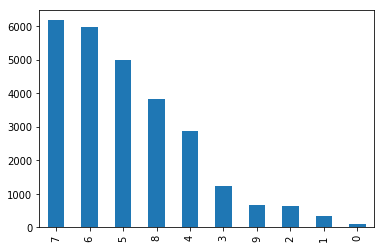

In [130]:
# Coverted age categorical data into numerical values
eff_diab_data.age.value_counts().plot(kind='bar')

# Second Step is converting treatment column with numerical values


In [131]:
eff_diab_data.treatments.replace(['insulin','io'],[0,1],inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


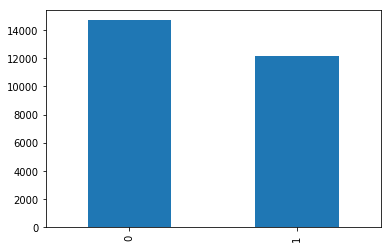

In [132]:
# Conveted treatment column with numerical values 0:Insulin,1: Insulin combination with other drugs
eff_diab_data.treatments.value_counts().plot(kind='bar')

In [135]:


eff_diab_data.head()



,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_diagnoses,...,num_medications,number_outpatient,number_emergency,number_inpatient,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatments
3,500364,82442376,Caucasian,Male,3,1,1,7,2,7,...,16,0,0,0,None,None,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,4,1,1,7,1,5,...,8,0,0,0,None,None,Ch,Yes,NO,1
6,55842,84259809,Caucasian,Male,6,3,1,2,4,7,...,21,0,0,0,None,None,Ch,Yes,NO,1
8,12522,48330783,Caucasian,Female,8,2,1,4,13,8,...,28,0,0,0,None,None,Ch,Yes,NO,1
9,15738,63555939,Caucasian,Female,9,3,3,4,12,8,...,18,0,0,0,None,None,Ch,Yes,NO,1


In [134]:
eff_diab_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26820 entries, 3 to 101764
Data columns (total 22 columns):
encounter_id                26820 non-null object
patient_nbr                 26820 non-null object
race                        26820 non-null object
gender                      26820 non-null object
age                         26820 non-null int32
admission_type_id           26820 non-null object
discharge_disposition_id    26820 non-null object
admission_source_id         26820 non-null object
time_in_hospital            26820 non-null object
number_diagnoses            26820 non-null object
num_lab_procedures          26820 non-null object
num_procedures              26820 non-null object
num_medications             26820 non-null object
number_outpatient           26820 non-null object
number_emergency            26820 non-null object
number_inpatient            26820 non-null object
max_glu_serum               26820 non-null object
A1Cresult                   26820 non-nul

In [137]:
 #Converting numeric colums to interger data type since data is in object data type
eff_diab_data[['encounter_id', 'patient_nbr','admission_type_id', 'discharge_disposition_id', 'admission_source_id','time_in_hospital', 'number_diagnoses', 'num_lab_procedures','num_procedures','num_medications', 'number_outpatient','number_emergency', 'number_inpatient']]=eff_diab_data[['encounter_id', 'patient_nbr','admission_type_id', 'discharge_disposition_id', 'admission_source_id','time_in_hospital', 'number_diagnoses', 'num_lab_procedures','num_procedures','num_medications', 'number_outpatient','number_emergency', 'number_inpatient']].astype('int64')


C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [138]:
# Creating new columns using get dummies for nominal data which helps in intrepretability of the model.
data_model=pd.get_dummies(eff_diab_data)
data_model.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_diagnoses,num_lab_procedures,num_procedures,...,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_Ch,change_No,diabetesMed_Yes,readmitted_NO
3,500364,82442376,3,1,1,7,2,7,44,1,...,1,0,0,0,1,0,1,0,1,1
4,16680,42519267,4,1,1,7,1,5,51,0,...,1,0,0,0,1,0,1,0,1,1
6,55842,84259809,6,3,1,2,4,7,70,1,...,1,0,0,0,1,0,1,0,1,1
8,12522,48330783,8,2,1,4,13,8,68,2,...,1,0,0,0,1,0,1,0,1,1
9,15738,63555939,9,3,3,4,12,8,33,3,...,1,0,0,0,1,0,1,0,1,1


Sincewe  don't have any domain expertise identifying the potential input variables is a challenging part.

Since the data is mostly of input of categorical data and output column is categorical it is suggested to perform chisquare test to check the statistical importance of each variable to choose potential input variables.
## Let's Perform CHI-SQUARE TEST OF INDEPENDENCE

In [143]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)
        

In [144]:
#Introducing some random numbers and checking weather the test is performing correctly or not on given data
data_model['dummyCat'] = np.random.choice([0, 1], size=(len(data_model),), p=[0.5, 0.5])
data_model.dummyCat.value_counts()

0    13438
1    13382
Name: dummyCat, dtype: int64

In [145]:
#Initialize ChiSquare Class
cT = ChiSquare(data_model)

#Feature Selection
testColumns = ['encounter_id', 'patient_nbr', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
        'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male',
       'max_glu_serum_>200', 'max_glu_serum_>300', 'max_glu_serum_None',
       'max_glu_serum_Norm', 'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None',
       'A1Cresult_Norm', 'change_Ch', 'change_No', 'diabetesMed_Yes',
       'readmitted_NO','dummyCat']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="treatments" )

encounter_id is NOT an important predictor. (Discard encounter_id from model)
patient_nbr is NOT an important predictor. (Discard patient_nbr from model)
age is IMPORTANT for Prediction
admission_type_id is IMPORTANT for Prediction
discharge_disposition_id is IMPORTANT for Prediction
admission_source_id is IMPORTANT for Prediction
time_in_hospital is IMPORTANT for Prediction
num_lab_procedures is NOT an important predictor. (Discard num_lab_procedures from model)
num_procedures is IMPORTANT for Prediction
num_medications is IMPORTANT for Prediction
number_outpatient is NOT an important predictor. (Discard number_outpatient from model)
number_emergency is NOT an important predictor. (Discard number_emergency from model)
number_inpatient is IMPORTANT for Prediction
race_AfricanAmerican is IMPORTANT for Prediction
race_Asian is NOT an important predictor. (Discard race_Asian from model)
race_Caucasian is IMPORTANT for Prediction
race_Hispanic is IMPORTANT for Prediction
race_Other is NOT 

# It is evident that the randomly introduced dummy cat is not an imporatant input variable and in chisquare test it results to discard the varible from model.

# Since there is no Domain Expertise taking all input variables as per statistical importance

# Model Building for predicting effective diabetic treatment based on characteristics of patient¶


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC

In [147]:
X = data_model.drop(['encounter_id','patient_nbr','age','num_lab_procedures','number_outpatient','number_emergency',
                      'race_Asian','race_Other','diabetesMed_Yes','max_glu_serum_>200','A1Cresult_>8','A1Cresult_Norm',
                      'readmitted_NO','dummyCat','treatments','dummyCat'],axis=1)
y=data_model['treatments']


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((18774, 20), (8046, 20), (18774,), (8046,))

In [149]:
y_p=[]
for i in range(y_test.shape[0]):
    y_p.append(y_test.mode()[0])#Highest class is assigned to a list which is compared with ytest
y_pred=pd.Series(y_p)
print('BaseLine Accuracy :',accuracy_score(y_test,y_pred))

BaseLine Accuracy : 0.5437484464330102


Baseline accuracy given by the data is 54.3% and if model is build then the model should have high accuracy than baseline accuracy

In [150]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)


In [151]:
traning_acc_lr = model_lr.score(X_train,y_train)
testing_acc_lr = accuracy_score(y_test,y_pred_lr)
print('............. LOGISTIC REGRESSION METRICS ...............')
print('Training Accuracy :',traning_acc_lr)
print('Testing Accuracy  :',testing_acc_lr)
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

............. LOGISTIC REGRESSION METRICS ...............
Training Accuracy : 0.7646745499094493
Testing Accuracy  : 0.7587621178225205
[[2508 1867]
 [  74 3597]]
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      4375
           1       0.66      0.98      0.79      3671

   micro avg       0.76      0.76      0.76      8046
   macro avg       0.81      0.78      0.75      8046
weighted avg       0.83      0.76      0.75      8046



In [153]:
# K nearest neighbours
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)

In [154]:
traning_acc_knn = model_knn.score(X_train,y_train)
testing_acc_knn = accuracy_score(y_test,y_pred_knn)
print('............. K-Nearest Neighbours METRICS ...............')
print('Training Accuracy :',traning_acc_knn)
print('Testing Accuracy  :',testing_acc_knn)
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

............. K-Nearest Neighbours METRICS ...............
Training Accuracy : 0.7988175135826142
Testing Accuracy  : 0.6713895103156848
[[2830 1545]
 [1099 2572]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.68      4375
           1       0.62      0.70      0.66      3671

   micro avg       0.67      0.67      0.67      8046
   macro avg       0.67      0.67      0.67      8046
weighted avg       0.68      0.67      0.67      8046



# Bernoulli Naive Bayes

In [157]:
model_bnb = BernoulliNB()
model_bnb.fit(X_train,y_train)
y_pred_bnb = model_bnb.predict(X_test)

In [160]:
traning_acc_bnb = model_bnb.score(X_train,y_train)
testing_acc_bnb = accuracy_score(y_test,y_pred_bnb)
print('Training Accuracy :',traning_acc_bnb)
print('Testing Accuracy  :',testing_acc_bnb)
print(confusion_matrix(y_test,y_pred_bnb))
print(classification_report(y_test,y_pred_bnb))

Training Accuracy : 0.7635559816767871
Testing Accuracy  : 0.7555306984837186
[[2408 1967]
 [   0 3671]]
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      4375
           1       0.65      1.00      0.79      3671

   micro avg       0.76      0.76      0.76      8046
   macro avg       0.83      0.78      0.75      8046
weighted avg       0.84      0.76      0.75      8046



In [161]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)

In [162]:
traning_acc_dt = model_dt.score(X_train,y_train)
testing_acc_dt = accuracy_score(y_test,y_pred_dt)
print('............. Decision Tree METRICS ...............')
print('Training Accuracy :',traning_acc_dt)
print('Testing Accuracy  :',testing_acc_dt)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

............. Decision Tree METRICS ...............
Training Accuracy : 0.9871630979013529
Testing Accuracy  : 0.6911508824260502
[[3189 1186]
 [1299 2372]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4375
           1       0.67      0.65      0.66      3671

   micro avg       0.69      0.69      0.69      8046
   macro avg       0.69      0.69      0.69      8046
weighted avg       0.69      0.69      0.69      8046



# Random forest

In [163]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [165]:
traning_acc_rf = model_rf.score(X_train,y_train)
testing_acc_rf = accuracy_score(y_test,y_pred_rf)
print('............. Random Forest METRICS ...............')
print('Training Accuracy :',traning_acc_rf)
print('Testing Accuracy  :',testing_acc_rf)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

............. Random Forest METRICS ...............
Training Accuracy : 0.9778416959625014
Testing Accuracy  : 0.7140193885160329
[[3067 1308]
 [ 993 2678]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      4375
           1       0.67      0.73      0.70      3671

   micro avg       0.71      0.71      0.71      8046
   macro avg       0.71      0.72      0.71      8046
weighted avg       0.72      0.71      0.71      8046



# hyper parameter tunning 
 Grid Search cv 
 Tunned KNN 
 

In [169]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=3)
knn_cv.fit(X_train,y_train)
print("Tuned Hyperparameter k: {}".format(knn_cv.best_params_))

Tuned Hyperparameter k: {'n_neighbors': 39}


In [170]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [172]:
model_tknn = KNeighborsClassifier(n_neighbors=39)
model_tknn.fit(X_train,y_train)
y_pred_tknn=model_tknn.predict(X_test)

In [173]:
traning_acc_tknn = model_tknn.score(X_train,y_train)
testing_acc_tknn = accuracy_score(y_test,y_pred_tknn)
print('............. Tunned K Nearest Neighbours METRICS ...............')
print('Training Accuracy :',traning_acc_tknn)
print('Testing Accuracy  :',testing_acc_tknn)
print(confusion_matrix(y_test,y_pred_tknn))
print(classification_report(y_test,y_pred_tknn))

............. Tunned K Nearest Neighbours METRICS ...............
Training Accuracy : 0.7241930329178652
Testing Accuracy  : 0.693636589609744
[[2844 1531]
 [ 934 2737]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      4375
           1       0.64      0.75      0.69      3671

   micro avg       0.69      0.69      0.69      8046
   macro avg       0.70      0.70      0.69      8046
weighted avg       0.70      0.69      0.69      8046



In [179]:
# GridSearchCV to find optimal max_depth
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)
tree.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [180]:
model_tdt = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=50,min_samples_split=50)
model_tdt.fit(X_train,y_train)
y_pred_tdt=model_tdt.predict(X_test)

In [181]:
training_acc_tdt = model_tdt.score(X_train,y_train)
testing_acc_tdt = accuracy_score(y_test,y_pred_tdt)
print('............. Tunned Decision Tree METRICS ...............')
print('Training Accuracy :',training_acc_tdt)
print('Testing Accuracy  :',testing_acc_tdt)
print(confusion_matrix(y_test,y_pred_tdt))
print(classification_report(y_test,y_pred_tdt))

............. Tunned Decision Tree METRICS ...............
Training Accuracy : 0.7669116863747736
Testing Accuracy  : 0.7564006959980114
[[2515 1860]
 [ 100 3571]]
              precision    recall  f1-score   support

           0       0.96      0.57      0.72      4375
           1       0.66      0.97      0.78      3671

   micro avg       0.76      0.76      0.76      8046
   macro avg       0.81      0.77      0.75      8046
weighted avg       0.82      0.76      0.75      8046



In [188]:
model_dt = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=2)

In [190]:
bagg = BaggingClassifier(model_dt,n_estimators=500,n_jobs=-1)

In [193]:
bagg = bagg.fit(X_train,y_train)

In [197]:
ypred = bagg.predict(X_test)

In [204]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_dt))

0.6911508824260502



# TUNED RANDOM FOREST

In [183]:
rfc=RandomForestClassifier(random_state=42)
parameter={'n_estimators':np.arange(1,101)}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameter, cv= 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([  1,   2, ...,  99, 100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
CV_rfc.best_params_


In [ ]:
model_trf = RandomForestClassifier(n_estimators=59)
model_trf.fit(X_train,y_train) 
y_pred_trf = model_trf.predict(X_test)

In [ ]:
training_acc_trf = model_trf.score(X_train,y_train)
testing_acc_trf = accuracy_score(y_test,y_pred_trf)
print('............. Tunned Random Forest METRICS ...............')
print('Training Accuracy :',training_acc_trf)
print('Testing Accuracy  :',testing_acc_trf)
print(confusion_matrix(y_test,y_pred_trf))
print(classification_report(y_test,y_pred_trf))

# SVM CLASSIFIER

In [ ]:
model_svc = SVC(kernel='linear')
model_svc.fit(X_train,y_train)
y_pred_svc = model_svc.predict(X_test)

In [ ]:
training_acc_svc = model_svc.score(X_train,y_train)
testing_acc_svc = accuracy_score(y_test,y_pred_svc)
print('............. Support Vector Classifier METRICS ...............')
print('Training Accuracy :',training_acc_svc)
print('Testing Accuracy  :',testing_acc_svc)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))


From the above Models comparision Graph Comparing Training and Testing Accuracy of differnt models and found that Logistic Regression is performing better and is generalised model since the training and testing accuracy are almost similar.

From Occam's razor rule it's the idea that the simplest and most direct solution should be preferred,So in this case simple model and given best accuracy is given by Logistic Regression.

## So,Logistic Regression will be our final model for predicting effective treatments of diabetic patients with 75% accuracy and giving least number of False Negative values compared to other models.

## From this 75% Accuracy we can infer that there are 75% for a patient who are taking predicted treatment will not readmit into the hospital and thus if patient taking a treatment and not admitted into the hopital then it an effective treatmen